In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn import mixture

from sklearn.cluster import DBSCAN
from sklearn import metrics


In [2]:
train = pd.read_csv('Data/교통사망사고정보/original_kor.csv',encoding='CP949')


In [3]:
train['발생지'] = train['발생지시도'] + train['발생지시군구']

In [4]:
train = train[(train.경도 > 125) & (train.경도 < 130) & (train.위도 > 34) & (train.위도 < 38.5)]

In [5]:
X = train[["경도", "위도"]].values

In [6]:
db = DBSCAN(eps=0.01, min_samples=9).fit(X)     ## 221 
#db = DBSCAN(eps=0.02, min_samples=13).fit(X)   ## 154
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
#print("Silhouette Coefficient: %0.3f"
#      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 221


In [7]:
unique_labels = set(labels)
len(labels[labels == 1])

648

In [8]:
from sklearn import mixture

gmm = mixture.GaussianMixture(n_components=160, covariance_type='full', random_state=42).fit(X)
labels = gmm.predict(X)

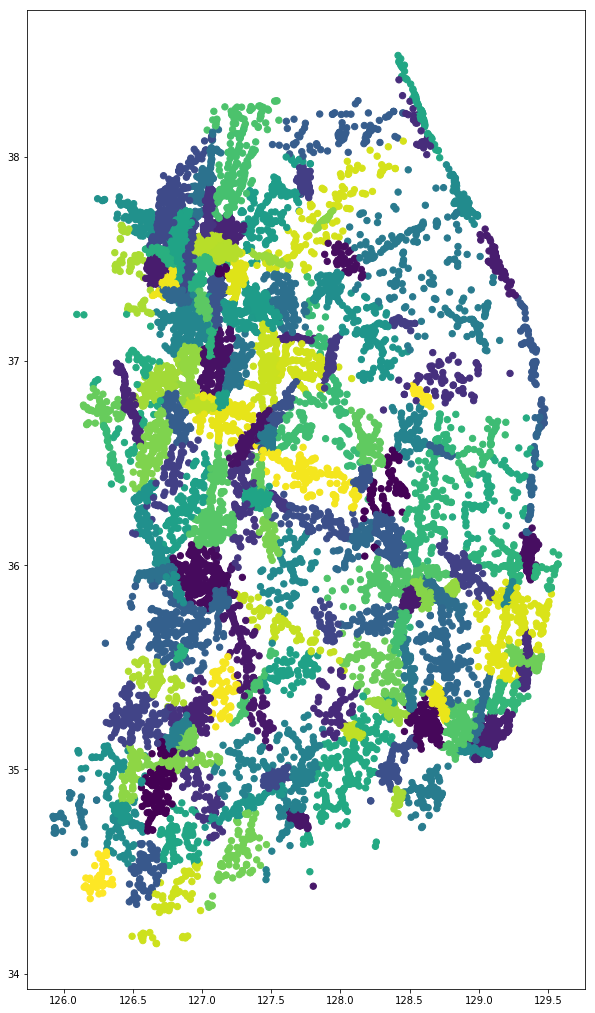

In [9]:
plt.figure(figsize=(10,18))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [10]:
probas = gmm.predict_proba(X)
probas.shape

np.amax(probas, axis=1)

array([0.87533603, 0.9890083 , 0.80929418, ..., 0.80838855, 0.99832886,
       0.78569689])

In [11]:
labels.shape

(24538,)

In [12]:
dpgmm = mixture.BayesianGaussianMixture(n_components=160, covariance_type='full').fit(X)
labels = dpgmm.predict(X)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


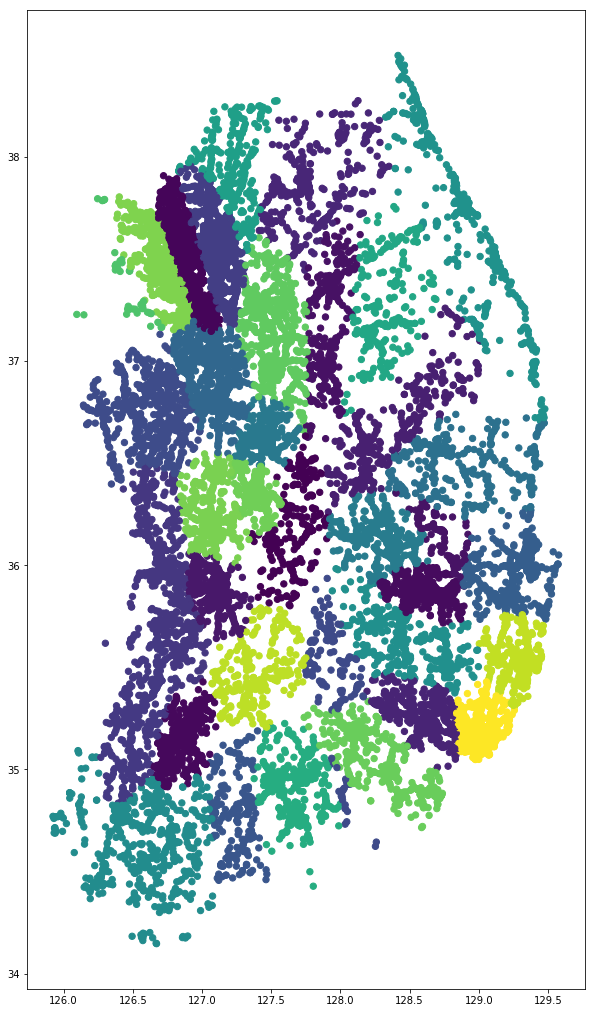

In [14]:
plt.figure(figsize=(10,18))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [13]:
dpprobas = dpgmm.predict_proba(X)
dpprobas.shape

dp_probas = np.amax(dpprobas, axis=1)

In [14]:
dp_probas.shape


(24538,)

In [15]:
labels.shape


(24538,)

In [16]:
train["클러스터번호"] = labels

train["클러스터속할확률"] = dp_probas

In [17]:
train_cluster_mean = train.groupby(['발생지','클러스터번호']).mean()['클러스터속할확률'].reset_index()
train_cluster_mean.head(5)

,발생지,클러스터번호,클러스터속할확률
0,강원강릉시,58,0.988919
1,강원고성군,58,0.957978
2,강원동해시,58,0.994712
3,강원삼척시,58,0.989080
4,강원속초시,58,0.974235


In [18]:
train_cluster_mean[train_cluster_mean['클러스터속할확률'] == train_cluster_mean.groupby(['발생지'])['클러스터속할확률'].transform(max)].head(5)

,발생지,클러스터번호,클러스터속할확률
0,강원강릉시,58,0.988919
1,강원고성군,58,0.957978
2,강원동해시,58,0.994712
3,강원삼척시,58,0.989080
4,강원속초시,58,0.974235
